# Obesity Dataset



In [49]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV into a pandas DataFrame
file_path = r"C:\Users\Brian\Documents\Learning\UofT Data Science\Team Project\Obesity-Risk-Scoring-Enhancing-Health-Insurance-Plans\Brian Ngo\data\raw\ObesityDataSet.csv"
data = pd.read_csv(file_path)

print(data.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [50]:
print(data.columns)
print(data.info())


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   S

## Variable Description

-Gender : Female/Male  
-Age : Numeric value  
-Height : Numeric value in meters  
-Weight : Numeric value in kilograms  
-Family History With Over Weight  
-FAVC : Frequent consumption of high caloric food  
-FCVC : Frequency of consumption of vegetables  
-NCP : Number of main meals  
-CAEC : Consumption of food between meals  
-CH20 : Consumption of water daily  
-CALC : Consumption of alcohol  
-SCC : Calories consumption monitoring  
-FAF : Physical activity frequency  
-TUE : Time using technology devices  
-MTRANS : Transportation used  


In [51]:
print(data.isnull().sum())


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [52]:
# Connect to SQLite
conn = sqlite3.connect('obesity_data.db')

# Save the dataset to SQLite
data.to_sql('obesity_dataset', conn, if_exists='replace', index=False)

2111

In [53]:
# Group by 'NObeyesdad' and count the occurrences
NObeyesdad_count = data.groupby('NObeyesdad').size().reset_index(name='count')

# Display the result
print(NObeyesdad_count)

            NObeyesdad  count
0  Insufficient_Weight    272
1        Normal_Weight    287
2       Obesity_Type_I    351
3      Obesity_Type_II    297
4     Obesity_Type_III    324
5   Overweight_Level_I    290
6  Overweight_Level_II    290


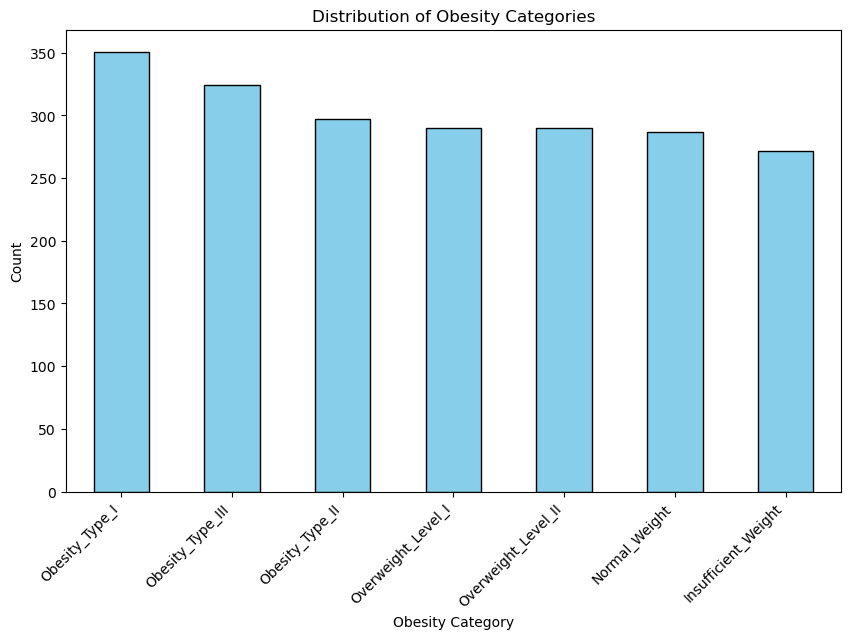

In [85]:
import matplotlib.pyplot as plt

# Count obesity categories
category_counts = data['NObeyesdad'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Obesity Categories')
plt.xlabel('Obesity Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


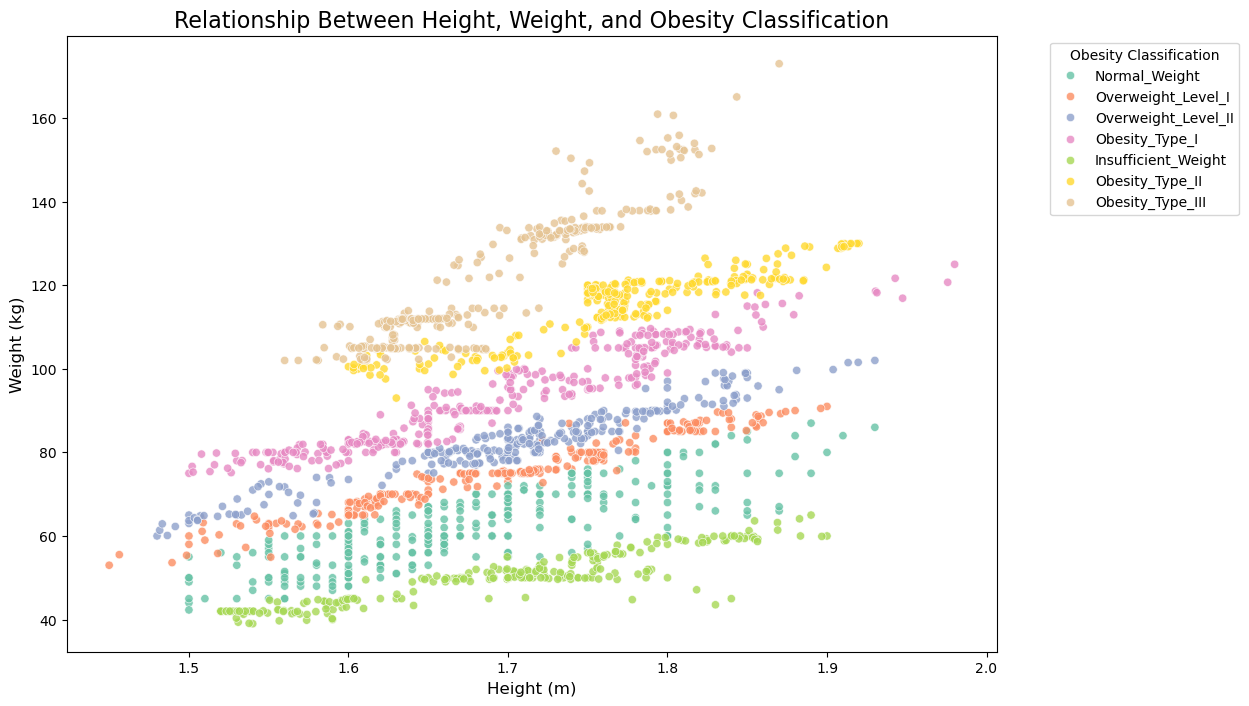

In [55]:
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(
    x='Height', 
    y='Weight', 
    hue='NObeyesdad', 
    data=data, 
    palette='Set2', 
    alpha=0.8
)

# Titles and labels
plt.title('Relationship Between Height, Weight, and Obesity Classification', fontsize=16)
plt.xlabel('Height (m)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.legend(title='Obesity Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [56]:
# Calculate BMI using the formula and add it as a new column
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Preview the dataset with the new column
print(data.head())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad        BMI  
0  Public_Transportation        Normal_Weight  24.386526  
1  Public_Transportation        Normal_Weight  24.238227  

In [57]:
# Check data types of all columns
print(data.dtypes)

# Identify ccategorical columns
categorical_columns = data.select_dtypes(exclude='number').columns
print("categorical_columns", categorical_columns)


Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object
categorical_columns Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


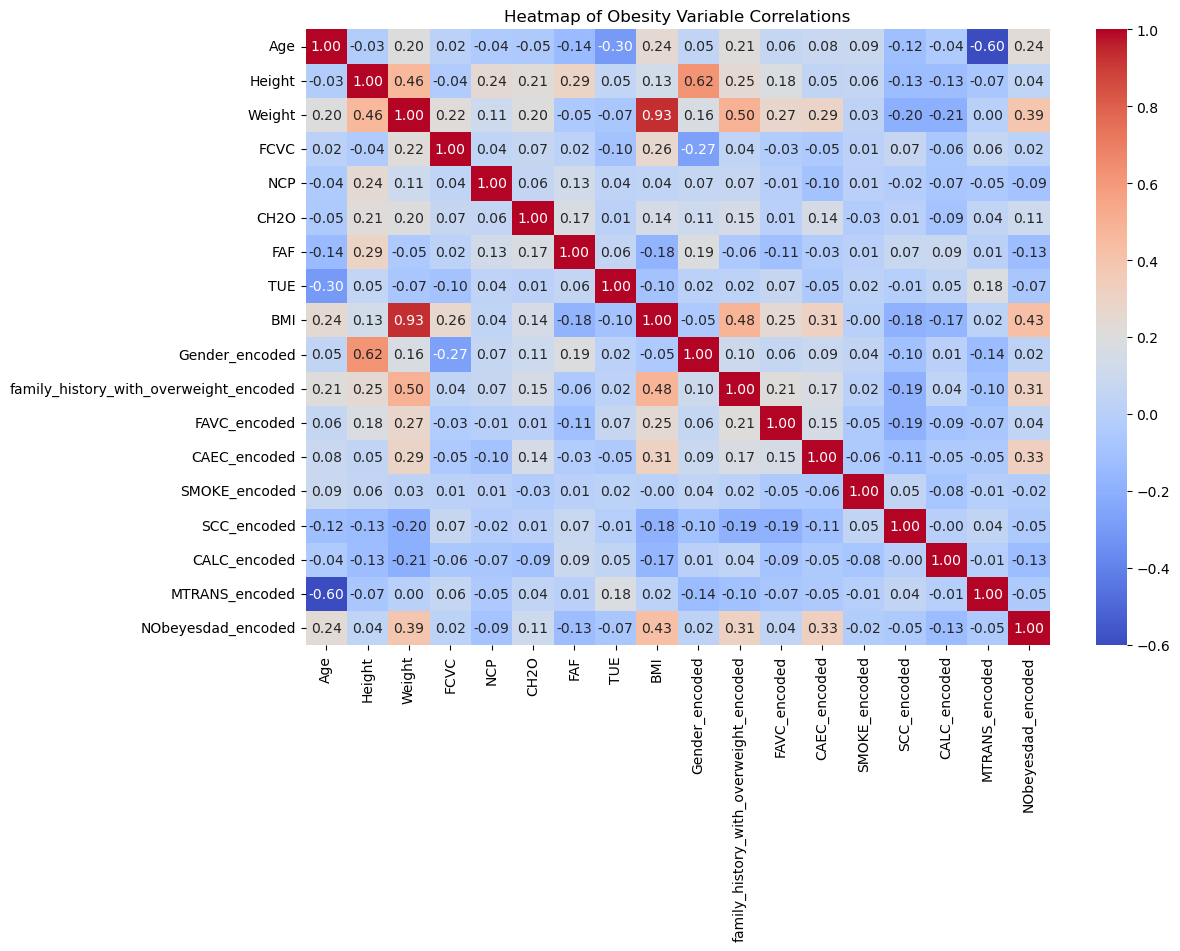

In [58]:
from sklearn.preprocessing import LabelEncoder

# Encode all non-numeric columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])

# Recalculate the correlation matrix with encoded columns
numeric_data_with_encoded = data.select_dtypes(include='number')
correlation_matrix = numeric_data_with_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Heatmap of Obesity Variable Correlations')
plt.show()


In [59]:
# Extract correlations with the obesity classification column
correlations_with_obesity = correlation_matrix['NObeyesdad_encoded'].sort_values(ascending=False)

# Display correlations
print("Correlations with Obesity Classification (NObeyesdad_encoded):")
print(correlations_with_obesity)


Correlations with Obesity Classification (NObeyesdad_encoded):
NObeyesdad_encoded                        1.000000
BMI                                       0.429686
Weight                                    0.387643
CAEC_encoded                              0.327295
family_history_with_overweight_encoded    0.313667
Age                                       0.236170
CH2O                                      0.108868
FAVC_encoded                              0.044582
Height                                    0.038986
Gender_encoded                            0.024908
FCVC                                      0.018522
SMOKE_encoded                            -0.023256
MTRANS_encoded                           -0.046202
SCC_encoded                              -0.050679
TUE                                      -0.069448
NCP                                      -0.092616
FAF                                      -0.129564
CALC_encoded                             -0.134632
Name: NObeyesdad_en

In [60]:
# Extract correlations with the weight column
correlations_with_weight = correlation_matrix['Weight'].sort_values(ascending=False)

# Display correlations
print("Correlations with Weight:")
print(correlations_with_weight)

Correlations with Weight:
Weight                                    1.000000
BMI                                       0.934806
family_history_with_overweight_encoded    0.496820
Height                                    0.463136
NObeyesdad_encoded                        0.387643
CAEC_encoded                              0.287493
FAVC_encoded                              0.272300
FCVC                                      0.216125
Age                                       0.202560
CH2O                                      0.200575
Gender_encoded                            0.161668
NCP                                       0.107469
SMOKE_encoded                             0.025746
MTRANS_encoded                            0.004610
FAF                                      -0.051436
TUE                                      -0.071561
SCC_encoded                              -0.201906
CALC_encoded                             -0.206677
Name: Weight, dtype: float64


In [61]:
# Extract correlations with the BMI column
correlations_with_BMI = correlation_matrix['BMI'].sort_values(ascending=False)

# Display correlations
print("Correlations with BMI:")
print(correlations_with_BMI)

Correlations with BMI:
BMI                                       1.000000
Weight                                    0.934806
family_history_with_overweight_encoded    0.483508
NObeyesdad_encoded                        0.429686
CAEC_encoded                              0.313278
FCVC                                      0.263651
FAVC_encoded                              0.246097
Age                                       0.244163
CH2O                                      0.144200
Height                                    0.131785
NCP                                       0.039969
MTRANS_encoded                            0.022061
SMOKE_encoded                            -0.000819
Gender_encoded                           -0.053035
TUE                                      -0.099720
CALC_encoded                             -0.169805
FAF                                      -0.177537
SCC_encoded                              -0.184286
Name: BMI, dtype: float64


Since NObeyesdad classification is determined by BMI, we can use Linear Regression to predict BMI and help understand obesity risks.

Linear regression is best for predicting continous numerical varibles. 


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 


# Select predictors and target variable (BMI)
X = data[['Height', 'Weight', 'CAEC_encoded', 'FCVC', 'FAVC_encoded', 'family_history_with_overweight_encoded', 'FAF', 'SCC_encoded']]
y = data['BMI']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [63]:
# Train the model
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)



LinearRegression()

In [64]:
# Model Coefficients and Intercept
coefficients = pd.Series(LR_model.coef_, index=X.columns)
print("Feature Coefficients:")
print(coefficients)
print("intercept:", LR_model.intercept_)

Feature Coefficients:
Height                                   -32.632894
Weight                                     0.331337
CAEC_encoded                               0.224688
FCVC                                       0.234303
FAVC_encoded                               0.234859
family_history_with_overweight_encoded     0.650761
FAF                                       -0.047631
SCC_encoded                               -0.400499
dtype: float64
intercept: 54.88626762904084


In [65]:
# Evaluate the model
y_pred = LR_model.predict(X_test)

# Calculate Performance Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 0.6304724182842331
R-squared (R^2): 0.9905087394294472


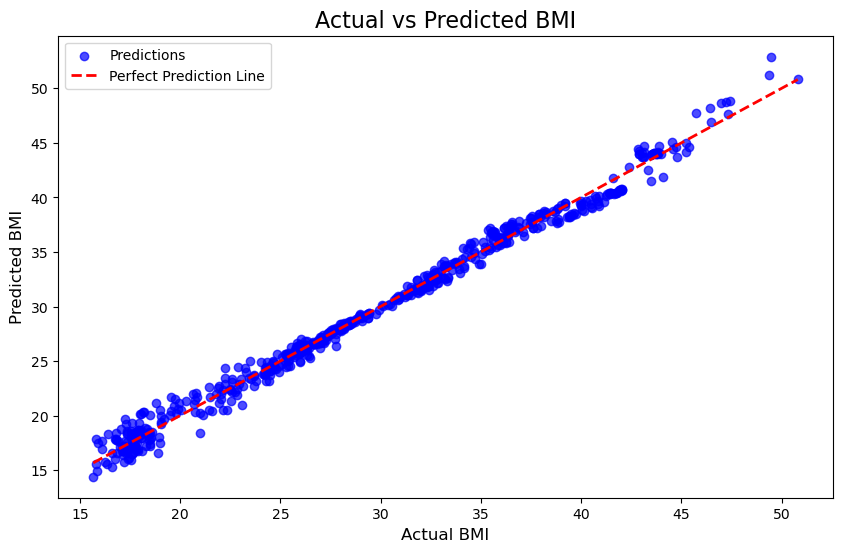

In [66]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction Line')

plt.title('Actual vs Predicted BMI', fontsize=16)
plt.xlabel('Actual BMI', fontsize=12)
plt.ylabel('Predicted BMI', fontsize=12)

plt.legend(loc='upper left', fontsize=10)

plt.show()



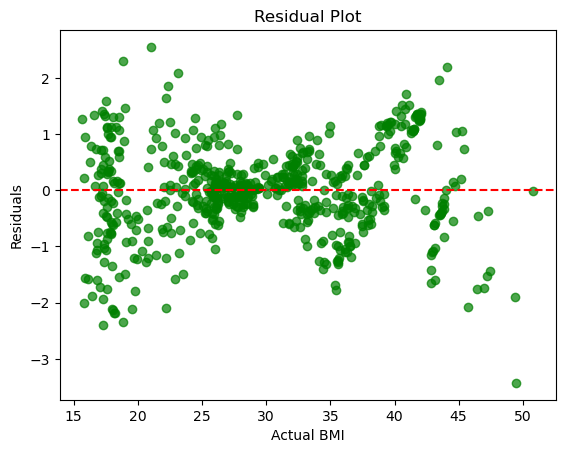

In [67]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual BMI')
plt.ylabel('Residuals')
plt.show()


In [70]:
print(data.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  ...        BMI Gender_encoded  \
0  3.0  Sometimes    no  ...  24.386526              0   
1  3.0  Sometimes   yes  ...  24.238227              0   
2  3.0  Sometimes    no  ...  23.765432              1   
3  3.0  Sometimes    no  ...  26.851852              1   
4  1.0  Sometimes    no  ...  28.342381              1   

   family_history_with_overweight_encoded  FAVC_encoded CAEC_encoded  \
0                                       1             0            2   
1                                       1   

In [71]:
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(data[col])
    
    print(f"\nMapping for {col}:")
    for index, class_label in enumerate(label_encoder.classes_):
        print(f"{class_label} -> {index}")


Mapping for Gender:
Female -> 0
Male -> 1

Mapping for family_history_with_overweight:
no -> 0
yes -> 1

Mapping for FAVC:
no -> 0
yes -> 1

Mapping for CAEC:
Always -> 0
Frequently -> 1
Sometimes -> 2
no -> 3

Mapping for SMOKE:
no -> 0
yes -> 1

Mapping for SCC:
no -> 0
yes -> 1

Mapping for CALC:
Always -> 0
Frequently -> 1
Sometimes -> 2
no -> 3

Mapping for MTRANS:
Automobile -> 0
Bike -> 1
Motorbike -> 2
Public_Transportation -> 3
Walking -> 4

Mapping for NObeyesdad:
Insufficient_Weight -> 0
Normal_Weight -> 1
Obesity_Type_I -> 2
Obesity_Type_II -> 3
Obesity_Type_III -> 4
Overweight_Level_I -> 5
Overweight_Level_II -> 6


In [81]:
# Use Random Forest Classifer to classify which eating habits and physical conditions most significantly predict obesity levels, as categorized by the NObesity classification system
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Split the data into features (X) and target (y)
X = data.drop(columns=['NObeyesdad', 'NObeyesdad_encoded', 'BMI'] + list(data.select_dtypes(include=['object']).columns))
y = data['NObeyesdad_encoded']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifer
rf_classifer = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifer.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifer.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', {accuracy})
print('Classification Report:\n', classification_rep)



Accuracy: {0.9353312302839116}
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.80      0.90      0.85        93
           2       0.98      0.94      0.96       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.90      0.84      0.87        88
           6       0.97      0.92      0.95        79

    accuracy                           0.94       634
   macro avg       0.94      0.93      0.94       634
weighted avg       0.94      0.94      0.94       634



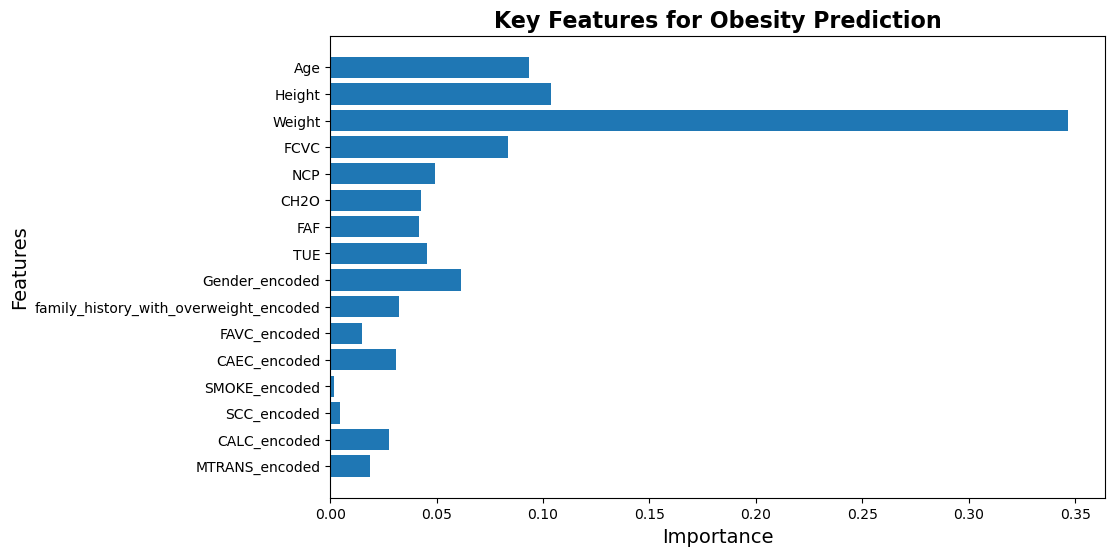

In [89]:
# Identify Features
feature_importance = rf_classifer.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Key Features for Obesity Prediction', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

plt.show()